Se implementa un función de distribución Gaussiana en dos dimensiones:

$f(X,Y) = \frac{1}{(2\pi)^{\frac{p}{2}}\left|\Sigma\right|^{\frac{p}{2}}}e^{{(X- \mu)}{\Sigma}^{-1}{(X- \mu)}^\top}$

En este ejemplo utilizamos la siguiente función media

$\mu = \begin{bmatrix} 2 & 2 \end{bmatrix}$

Y la función de covarianza que utilizamos es la siguiente

$\Sigma = \begin{bmatrix} 0.5 & 0 \\ 0 &0.5 \end{bmatrix}$

Finalmente se grafican las curva de nivel

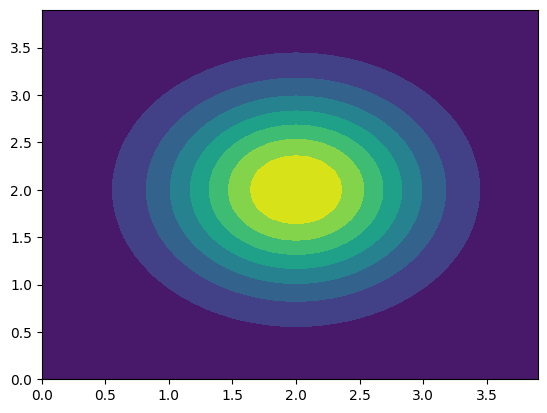

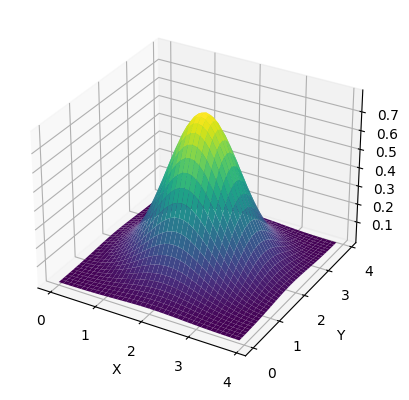

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Se definen las funciones medias y de covarianza
Sigma = np.zeros((2,2))
U = np.zeros((1,2))
Sigma[0,0] = 0.5
Sigma[1,1] = 0.5
U[0,0] = 2
U[0,1] = 2
# Se calculan los parámetros de la Gaussiana
# Se inicia por la constante de normalización
p = U.shape[0]
kn = (1)/(((2*np.pi)**(p/2))*((np.linalg.det(Sigma))**0.5))
#se crea la cuadricula
x = np.arange(0, 4, 0.1)
y = x
X, Y = np.meshgrid(x, y)
X_vector = X.ravel()
Y_vector = Y.ravel()
# Se define el vector de la función de distribución de probabilidad en dos dimensiones
fxy = np.zeros((X_vector.shape[0],1))
# Se evalua la función de distribución en cada valor de entrada
for i in range(X_vector.shape[0]):
  A = np.array(([X_vector[i], Y_vector[i]]))
  fxy[i]= -0.5*np.dot(A -U, np.dot(np.linalg.inv(Sigma), (A -U).T))
# Se normaliza la función de distribución de probablidad
fxy= kn*np.exp(fxy)
# Se grafican los contornos, es decir, las curvas de nivel
plt.contourf(X, Y, fxy.reshape(X.shape), cmap='viridis')
plt.show()
# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Graficar la superficie de fxy
surf = ax.plot_surface(X, Y, fxy.reshape(X.shape), cmap='viridis')

# Etiquetas de los ejes
ax.set_zlabel('Z')
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Título del gráfico
#ax.set_title('Distribución Gaussiana en dos dimensiones')
plt.show()